In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from sklearn import set_config
set_config(display="diagram")

import time

In [ ]:
house_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing-classification-iter6.csv')
house_data

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,8450,65.0,856,3,0,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,9600,80.0,1262,3,1,0,2,298,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,11250,68.0,920,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,9550,60.0,756,3,1,0,3,0,0,0,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,14260,84.0,1145,4,1,0,3,192,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,13175,85.0,1542,3,2,0,2,349,0,0,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,9042,66.0,1152,4,2,0,1,0,0,1,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,9717,68.0,1078,2,0,0,1,366,0,0,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   PoolArea       1460 non-null   int64  
 6   GarageCars     1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   ScreenPorch    1460 non-null   int64  
 9   Expensive      1460 non-null   int64  
 10  MSZoning       1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Heating        1460 non-null   object 
 13  Street         1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Foundation     1460 non-null   object 
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  BsmtQual

In [ ]:
y = house_data.pop('Expensive')
y

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    1
1458    0
1459    0
Name: Expensive, Length: 1460, dtype: int64

In [ ]:
y.value_counts()

0    1243
1     217
Name: Expensive, dtype: int64

##### **Prepare the data categories into numerical and categorical data**

In [ ]:
X_num = house_data.select_dtypes(include='number')
X_num

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSSubClass,...,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold,Id
0,8450,65.0,856,3,0,0,2,0,0,60,...,8,2003.0,548,61,0,0,0,2,2008,1
1,9600,80.0,1262,3,1,0,2,298,0,20,...,6,1976.0,460,0,0,0,0,5,2007,2
2,11250,68.0,920,3,1,0,2,0,0,60,...,6,2001.0,608,42,0,0,0,9,2008,3
3,9550,60.0,756,3,1,0,3,0,0,70,...,7,1998.0,642,35,272,0,0,2,2006,4
4,14260,84.0,1145,4,1,0,3,192,0,60,...,9,2000.0,836,84,0,0,0,12,2008,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,60,...,7,1999.0,460,40,0,0,0,8,2007,1456
1456,13175,85.0,1542,3,2,0,2,349,0,20,...,7,1978.0,500,0,0,0,0,2,2010,1457
1457,9042,66.0,1152,4,2,0,1,0,0,70,...,9,1941.0,252,60,0,0,2500,5,2010,1458
1458,9717,68.0,1078,2,0,0,1,366,0,20,...,5,1950.0,240,0,112,0,0,4,2010,1459


In [ ]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   PoolArea       1460 non-null   int64  
 6   GarageCars     1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   ScreenPorch    1460 non-null   int64  
 9   MSSubClass     1460 non-null   int64  
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  MasVnrArea     1452 non-null   float64
 15  BsmtFinSF1     1460 non-null   int64  
 16  BsmtFinSF2     1460 non-null   int64  
 17  BsmtUnfSF      1460 non-null   int64  
 18  1stFlrSF

In [ ]:
X_cat = house_data.select_dtypes(include='object')
X_cat

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,ExterQual,ExterCond,BsmtQual,BsmtCond,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Feedr,GasA,Pave,Y,CBlock,TA,TA,Gd,TA,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Norm,GasA,Pave,Y,BrkTil,TA,TA,TA,Gd,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Norm,GasA,Pave,Y,PConc,TA,TA,Gd,TA,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Norm,GasA,Pave,Y,CBlock,TA,TA,Gd,TA,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Norm,GasA,Pave,Y,Stone,Ex,Gd,TA,Gd,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Norm,GasA,Pave,Y,CBlock,TA,TA,TA,TA,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Condition1     1460 non-null   object
 2   Heating        1460 non-null   object
 3   Street         1460 non-null   object
 4   CentralAir     1460 non-null   object
 5   Foundation     1460 non-null   object
 6   ExterQual      1460 non-null   object
 7   ExterCond      1460 non-null   object
 8   BsmtQual       1423 non-null   object
 9   BsmtCond       1423 non-null   object
 10  BsmtExposure   1422 non-null   object
 11  BsmtFinType1   1423 non-null   object
 12  KitchenQual    1460 non-null   object
 13  FireplaceQu    770 non-null    object
 14  Alley          91 non-null     object
 15  LotShape       1460 non-null   object
 16  LandContour    1460 non-null   object
 17  Utilities      1460 non-null   object
 18  LotConfig      1460 non-null

In [ ]:
# Investigate each feature in the numerical data.
X_num['MasVnrArea'].value_counts()
# drop PoolArea, ScreenPorch, LowQualFinSF, BsmtHalfBath, EnclosedPorch, 3SsnPorch, MiscVal, Id; they have no substantial variability.
# convert all date entries and MSSubClass to one-hot categorical features.

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [ ]:
X_cat['MoSold'] = X_num.pop('MoSold')
X_cat['MoSold'] = X_cat['MoSold'].astype(str)

X_cat['YrSold'] = X_num.pop('YrSold')
X_cat['YrSold'] = X_cat['YrSold'].astype(str)

X_cat['YearBuilt'] = X_num.pop('YearBuilt')
X_cat['YearBuilt'] = X_cat['YearBuilt'].astype(str)

X_cat['YearRemodAdd'] = X_num.pop('YearRemodAdd')
X_cat['YearRemodAdd'] = X_cat['YearRemodAdd'].astype(str)

X_cat['GarageYrBlt'] = X_num.pop('GarageYrBlt')
X_cat['GarageYrBlt'] = X_cat['GarageYrBlt'].astype(str)

X_cat['MSSubClass'] = X_num.pop('MSSubClass')
X_cat['MSSubClass'] = X_cat['MSSubClass'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
X_num = X_num.drop(['PoolArea', 'ScreenPorch', 'LowQualFinSF',\
                    'BsmtHalfBath', 'EnclosedPorch', '3SsnPorch', 'MiscVal', 'Id'], axis=1)

X_num

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OverallQual,OverallCond,MasVnrArea,...,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,GarageArea,OpenPorchSF
0,8450,65.0,856,3,0,2,0,7,5,196.0,...,856,854,1710,1,2,1,1,8,548,61
1,9600,80.0,1262,3,1,2,298,6,8,0.0,...,1262,0,1262,0,2,0,1,6,460,0
2,11250,68.0,920,3,1,2,0,7,5,162.0,...,920,866,1786,1,2,1,1,6,608,42
3,9550,60.0,756,3,1,3,0,7,5,0.0,...,961,756,1717,1,1,0,1,7,642,35
4,14260,84.0,1145,4,1,3,192,8,5,350.0,...,1145,1053,2198,1,2,1,1,9,836,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,2,0,6,5,0.0,...,953,694,1647,0,2,1,1,7,460,40
1456,13175,85.0,1542,3,2,2,349,6,6,119.0,...,2073,0,2073,1,2,0,1,7,500,0
1457,9042,66.0,1152,4,2,1,0,7,9,0.0,...,1188,1152,2340,0,2,0,1,9,252,60
1458,9717,68.0,1078,2,0,1,366,5,6,0.0,...,1078,0,1078,1,1,0,1,5,240,0


In [ ]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   GarageCars    1460 non-null   int64  
 6   WoodDeckSF    1460 non-null   int64  
 7   OverallQual   1460 non-null   int64  
 8   OverallCond   1460 non-null   int64  
 9   MasVnrArea    1452 non-null   float64
 10  BsmtFinSF1    1460 non-null   int64  
 11  BsmtFinSF2    1460 non-null   int64  
 12  BsmtUnfSF     1460 non-null   int64  
 13  1stFlrSF      1460 non-null   int64  
 14  2ndFlrSF      1460 non-null   int64  
 15  GrLivArea     1460 non-null   int64  
 16  BsmtFullBath  1460 non-null   int64  
 17  FullBath      1460 non-null   int64  
 18  HalfBath      1460 non-null 

In [ ]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Condition1     1460 non-null   object
 2   Heating        1460 non-null   object
 3   Street         1460 non-null   object
 4   CentralAir     1460 non-null   object
 5   Foundation     1460 non-null   object
 6   ExterQual      1460 non-null   object
 7   ExterCond      1460 non-null   object
 8   BsmtQual       1423 non-null   object
 9   BsmtCond       1423 non-null   object
 10  BsmtExposure   1422 non-null   object
 11  BsmtFinType1   1423 non-null   object
 12  KitchenQual    1460 non-null   object
 13  FireplaceQu    770 non-null    object
 14  Alley          91 non-null     object
 15  LotShape       1460 non-null   object
 16  LandContour    1460 non-null   object
 17  Utilities      1460 non-null   object
 18  LotConfig      1460 non-null

In [ ]:
X_cat_ord = X_cat[['GarageCond', 'GarageFinish', 'GarageQual', 'Electrical', 'HeatingQC', 'BsmtFinType2',\
                   'BsmtFinType1', 'BsmtExposure', 'KitchenQual', 'BsmtQual', 'BsmtCond', 'ExterCond', 'ExterQual', 'Functional']]

X_cat_ord

,GarageCond,GarageFinish,GarageQual,Electrical,HeatingQC,BsmtFinType2,BsmtFinType1,BsmtExposure,KitchenQual,BsmtQual,BsmtCond,ExterCond,ExterQual,Functional
0,TA,RFn,TA,SBrkr,Ex,Unf,GLQ,No,Gd,Gd,TA,TA,Gd,Typ
1,TA,RFn,TA,SBrkr,Ex,Unf,ALQ,Gd,TA,Gd,TA,TA,TA,Typ
2,TA,RFn,TA,SBrkr,Ex,Unf,GLQ,Mn,Gd,Gd,TA,TA,Gd,Typ
3,TA,Unf,TA,SBrkr,Gd,Unf,ALQ,No,Gd,TA,Gd,TA,TA,Typ
4,TA,RFn,TA,SBrkr,Ex,Unf,GLQ,Av,Gd,Gd,TA,TA,Gd,Typ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,TA,RFn,TA,SBrkr,Ex,Unf,Unf,No,TA,Gd,TA,TA,TA,Typ
1456,TA,Unf,TA,SBrkr,TA,Rec,ALQ,No,TA,Gd,TA,TA,TA,Min1
1457,TA,RFn,TA,SBrkr,Ex,Unf,GLQ,No,Gd,TA,Gd,Gd,Ex,Typ
1458,TA,Unf,TA,FuseA,Gd,Rec,GLQ,Mn,Gd,TA,TA,TA,TA,Typ


In [ ]:
X_cat_onehot = X_cat.drop(['Fence', 'GarageCond', 'GarageFinish', 'GarageQual', 'Electrical', 'HeatingQC', 'BsmtFinType2', 'FireplaceQu', 'Alley', \
                           'BsmtFinType1', 'BsmtExposure', 'KitchenQual', 'BsmtQual', 'BsmtCond', 'ExterCond', 'ExterQual', 'PoolQC', 'MiscFeature', 'Functional'], axis=1)

X_cat_onehot

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,LotShape,LandContour,Utilities,LotConfig,...,GarageType,PavedDrive,SaleType,SaleCondition,MoSold,YrSold,YearBuilt,YearRemodAdd,GarageYrBlt,MSSubClass
0,RL,Norm,GasA,Pave,Y,PConc,Reg,Lvl,AllPub,Inside,...,Attchd,Y,WD,Normal,2,2008,2003,2003,2003.0,60
1,RL,Feedr,GasA,Pave,Y,CBlock,Reg,Lvl,AllPub,FR2,...,Attchd,Y,WD,Normal,5,2007,1976,1976,1976.0,20
2,RL,Norm,GasA,Pave,Y,PConc,IR1,Lvl,AllPub,Inside,...,Attchd,Y,WD,Normal,9,2008,2001,2002,2001.0,60
3,RL,Norm,GasA,Pave,Y,BrkTil,IR1,Lvl,AllPub,Corner,...,Detchd,Y,WD,Abnorml,2,2006,1915,1970,1998.0,70
4,RL,Norm,GasA,Pave,Y,PConc,IR1,Lvl,AllPub,FR2,...,Attchd,Y,WD,Normal,12,2008,2000,2000,2000.0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Norm,GasA,Pave,Y,PConc,Reg,Lvl,AllPub,Inside,...,Attchd,Y,WD,Normal,8,2007,1999,2000,1999.0,60
1456,RL,Norm,GasA,Pave,Y,CBlock,Reg,Lvl,AllPub,Inside,...,Attchd,Y,WD,Normal,2,2010,1978,1988,1978.0,20
1457,RL,Norm,GasA,Pave,Y,Stone,Reg,Lvl,AllPub,Inside,...,Attchd,Y,WD,Normal,5,2010,1941,2006,1941.0,70
1458,RL,Norm,GasA,Pave,Y,CBlock,Reg,Lvl,AllPub,Inside,...,Attchd,Y,WD,Normal,4,2010,1950,1996,1950.0,20


In [ ]:
X_cat_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageCond    1379 non-null   object
 1   GarageFinish  1379 non-null   object
 2   GarageQual    1379 non-null   object
 3   Electrical    1459 non-null   object
 4   HeatingQC     1460 non-null   object
 5   BsmtFinType2  1422 non-null   object
 6   BsmtFinType1  1423 non-null   object
 7   BsmtExposure  1422 non-null   object
 8   KitchenQual   1460 non-null   object
 9   BsmtQual      1423 non-null   object
 10  BsmtCond      1423 non-null   object
 11  ExterCond     1460 non-null   object
 12  ExterQual     1460 non-null   object
 13  Functional    1460 non-null   object
dtypes: object(14)
memory usage: 159.8+ KB


In [ ]:
X_cat_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Condition1     1460 non-null   object
 2   Heating        1460 non-null   object
 3   Street         1460 non-null   object
 4   CentralAir     1460 non-null   object
 5   Foundation     1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  RoofStyle      1460 non-null   object
 16  RoofMatl       1460 non-null   object
 17  Exterior1st    1460 non-null   object
 18  Exterior2nd    1460 non-null

##### **Adjust certain numerical features**

In [ ]:
X_num[X_num.MasVnrArea.isna()]

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OverallQual,OverallCond,MasVnrArea,...,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,GarageArea,OpenPorchSF
234,7851,NaN,860,4,2,2,288,6,5,NaN,...,860,1100,1960,1,2,1,1,8,440,48
529,32668,NaN,2035,4,2,2,0,6,3,NaN,...,2515,0,2515,1,3,0,2,9,484,0
650,8125,65.0,813,3,0,2,0,7,6,NaN,...,822,843,1665,0,2,1,1,7,562,0
936,10083,67.0,1176,2,0,2,0,7,5,NaN,...,1200,0,1200,1,2,0,1,5,555,41
973,11639,95.0,1428,3,0,2,0,7,5,NaN,...,1428,0,1428,0,2,0,1,6,480,120
977,4274,35.0,1241,1,0,2,0,7,5,NaN,...,1241,0,1241,1,1,1,1,4,569,116
1243,13891,107.0,2076,2,1,3,216,10,5,NaN,...,2076,0,2076,1,2,1,1,7,850,229
1278,9473,75.0,1128,3,1,2,0,8,5,NaN,...,1128,903,2031,1,2,1,1,7,577,211


In [ ]:
filler = int(np.round(np.median([x for x in X_num.MasVnrArea if (x != 0) & (x == x)])))

for x in list(X_num[X_num.MasVnrArea.isna()].index):
    X_num.loc[x, 'MasVnrArea'] = filler

In [ ]:
X_num[X_num.MasVnrArea.isna()]

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OverallQual,OverallCond,MasVnrArea,...,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,GarageArea,OpenPorchSF


In [ ]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   GarageCars    1460 non-null   int64  
 6   WoodDeckSF    1460 non-null   int64  
 7   OverallQual   1460 non-null   int64  
 8   OverallCond   1460 non-null   int64  
 9   MasVnrArea    1460 non-null   float64
 10  BsmtFinSF1    1460 non-null   int64  
 11  BsmtFinSF2    1460 non-null   int64  
 12  BsmtUnfSF     1460 non-null   int64  
 13  1stFlrSF      1460 non-null   int64  
 14  2ndFlrSF      1460 non-null   int64  
 15  GrLivArea     1460 non-null   int64  
 16  BsmtFullBath  1460 non-null   int64  
 17  FullBath      1460 non-null   int64  
 18  HalfBath      1460 non-null 

##### **Check the numerical data**

In [ ]:
numeric_pipeline = make_pipeline(SimpleImputer())
numeric_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer())])

In [ ]:
full_pipeline = make_pipeline(numeric_pipeline, DecisionTreeClassifier())
full_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer', SimpleImputer())])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
param_grid = {'decisiontreeclassifier__criterion': ['gini', 'entropy'],
              'decisiontreeclassifier__max_depth': range(2, 8, 2),
              'decisiontreeclassifier__min_samples_leaf': range(3, 5, 2),
              'decisiontreeclassifier__min_samples_split': range(5, 15, 5)
             }
param_grid

{'decisiontreeclassifier__criterion': ['gini', 'entropy'],
 'decisiontreeclassifier__max_depth': range(2, 8, 2),
 'decisiontreeclassifier__min_samples_leaf': range(3, 5, 2),
 'decisiontreeclassifier__min_samples_split': range(5, 15, 5)}

In [ ]:
search = GridSearchCV(full_pipeline, param_grid, cv=5, verbose=1)
search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('simpleimputer',
                                                         SimpleImputer())])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 8, 2),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 5, 2),
                         'decisiontreeclassifier__min_samples_split': range(5, 15, 5)},
             verbose=1)

In [ ]:
search.fit(X_num, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('simpleimputer',
                                                         SimpleImputer())])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 8, 2),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 5, 2),
                         'decisiontreeclassifier__min_samples_split': range(5, 15, 5)},
             verbose=1)

##### **Check Ordinal Categorical Data**

In [ ]:
X_cat_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageCond    1379 non-null   object
 1   GarageFinish  1379 non-null   object
 2   GarageQual    1379 non-null   object
 3   Electrical    1459 non-null   object
 4   HeatingQC     1460 non-null   object
 5   BsmtFinType2  1422 non-null   object
 6   BsmtFinType1  1423 non-null   object
 7   BsmtExposure  1422 non-null   object
 8   KitchenQual   1460 non-null   object
 9   BsmtQual      1423 non-null   object
 10  BsmtCond      1423 non-null   object
 11  ExterCond     1460 non-null   object
 12  ExterQual     1460 non-null   object
 13  Functional    1460 non-null   object
dtypes: object(14)
memory usage: 159.8+ KB


In [ ]:
X_cat_ord.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [ ]:
X_cat_ord[X_cat_ord.Electrical.isna()]

,GarageCond,GarageFinish,GarageQual,Electrical,HeatingQC,BsmtFinType2,BsmtFinType1,BsmtExposure,KitchenQual,BsmtQual,BsmtCond,ExterCond,ExterQual,Functional
1379,TA,Fin,TA,NaN,Gd,Unf,Unf,No,Gd,Gd,TA,TA,TA,Typ


In [ ]:
X_cat_ord.loc[1379, 'Electrical'] = 'Mix'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
X_cat_ord[X_cat_ord.Electrical.isna()]

,GarageCond,GarageFinish,GarageQual,Electrical,HeatingQC,BsmtFinType2,BsmtFinType1,BsmtExposure,KitchenQual,BsmtQual,BsmtCond,ExterCond,ExterQual,Functional


In [ ]:
categ_a = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_b = ['N_A', 'NA', 'Unf', 'RFn', 'Fin']
categ_c = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_d = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
categ_e = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_f = ['N_A', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
categ_g = ['N_A', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
categ_h = ['N_A', 'NA', 'No', 'Mn', 'Av', 'Gd']
categ_i = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_j = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_k = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_l = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_m = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_n = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']


cat_ord_categ = [categ_a, categ_b, categ_c, categ_d, categ_e, categ_f, categ_g, \
                 categ_h, categ_i, categ_j, categ_k, categ_l, categ_m, categ_n]

In [ ]:
cat_ordinal_pipeline = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),\
                                     OrdinalEncoder(categories=cat_ord_categ))
cat_ordinal_pipeline

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='N_A', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['N_A', 'NA', 'Po', 'Fa', 'TA',
                                             'Gd', 'Ex'],
                                            ['N_A', 'NA', 'Unf', 'RFn', 'Fin'],
                                            ['N_A', 'NA', 'Po', 'Fa', 'TA',
                                             'Gd', 'Ex'],
                                            ['Mix', 'FuseP', 'FuseF', 'FuseA',
                                             'SBrkr'],
                                            ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                            ['N_A', 'NA', 'Unf', 'LwQ', 'Rec',
                                             'BLQ', 'ALQ', 'GLQ'],
                                            ['N_A', 'NA', 'Unf', 'LwQ', 'Rec',
                                             'BLQ', 'ALQ', 'GLQ'],
                                            ['N_A', 'NA', 'No', 'Mn', 'Av',
                                             'Gd'],
                                            ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                            ['N_A', 'NA', 'Po', 'Fa', 'TA',
                                             'Gd', 'Ex'],
                                            ['N_A', 'NA', 'Po', 'Fa', 'TA',
                                             'Gd', 'Ex'],
                                            ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                            ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                            ['Sal', 'Sev', 'Maj2', 'Maj1',
                                             'Mod', 'Min2', 'Min1', 'Typ']]))])

In [ ]:
full_pipeline = make_pipeline(cat_ordinal_pipeline, DecisionTreeClassifier())
full_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(fill_value='N_A',
                                                strategy='constant')),
                                 ('ordinalencoder',
                                  OrdinalEncoder(categories=[['N_A', 'NA', 'Po',
                                                              'Fa', 'TA', 'Gd',
                                                              'Ex'],
                                                             ['N_A', 'NA',
                                                              'Unf', 'RFn',
                                                              'Fin'],
                                                             ['N_A', 'NA', 'Po',
                                                              'Fa', 'TA', 'Gd',
                                                              'Ex'],
                                                             ['Mix', 'FuseP',
                                                              'FuseF', 'FuseA',
                                                              'SBrkr'],
                                                             ['Po', 'Fa', 'TA',
                                                              'Gd', 'Ex'],
                                                             ['N_A', 'NA',
                                                              'Unf'...
                                                             ['N_A', 'NA',
                                                              'Unf', 'LwQ',
                                                              'Rec', 'BLQ',
                                                              'ALQ', 'GLQ'],
                                                             ['N_A', 'NA', 'No',
                                                              'Mn', 'Av',
                                                              'Gd'],
                                                             ['Po', 'Fa', 'TA',
                                                              'Gd', 'Ex'],
                                                             ['N_A', 'NA', 'Po',
                                                              'Fa', 'TA', 'Gd',
                                                              'Ex'],
                                                             ['N_A', 'NA', 'Po',
                                                              'Fa', 'TA', 'Gd',
                                                              'Ex'],
                                                             ['Po', 'Fa', 'TA',
                                                              'Gd', 'Ex'],
                                                             ['Po', 'Fa', 'TA',
                                                              'Gd', 'Ex'],
                                                             ['Sal', 'Sev',
                                                              'Maj2', 'Maj1',
                                                              'Mod', 'Min2',
                                                              'Min1',
                                                              'Typ']]))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
param_grid = {'decisiontreeclassifier__criterion': ['gini', 'entropy'],
              'decisiontreeclassifier__max_depth': range(2, 8, 2),
              'decisiontreeclassifier__min_samples_leaf': range(3, 5, 2),
              'decisiontreeclassifier__min_samples_split': range(5, 15, 5)
             }
param_grid

{'decisiontreeclassifier__criterion': ['gini', 'entropy'],
 'decisiontreeclassifier__max_depth': range(2, 8, 2),
 'decisiontreeclassifier__min_samples_leaf': range(3, 5, 2),
 'decisiontreeclassifier__min_samples_split': range(5, 15, 5)}

In [ ]:
search = GridSearchCV(full_pipeline, param_grid, cv=5, verbose=1)
search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('simpleimputer',
                                                         SimpleImputer(fill_value='N_A',
                                                                       strategy='constant')),
                                                        ('ordinalencoder',
                                                         OrdinalEncoder(categories=[['N_A',
                                                                                     'NA',
                                                                                     'Po',
                                                                                     'Fa',
                                                                                     'TA',
                                                                                     'Gd',
                                                                                     'Ex'],
                                                                                    ['N_A',
                                                                                     'NA',
                                                                                     'Unf',
                                                                                     'RFn',
                                                                                     'Fin'],
                                                                                    ['N_A',
                                                                                     'NA',
                                                                                     'Po',
                                                                                     'Fa',
                                                                                     'TA',
                                                                                     'Gd',
                                                                                     'Ex'],
                                                                                    ['Mix',
                                                                                     'FuseP',
                                                                                     'FuseF',
                                                                                     'FuseA',
                                                                                     'SBrkr'],
                                                                                    ['Po',
                                                                                     'Fa',
                                                                                     'TA',...
                                                                                    ['Sal',
                                                                                     'Sev',
                                                                                     'Maj2',
                                                                                     'Maj1',
                                                                                     'Mod',
                                                                                     'Min2',
                                                                                     'Min1',
                                                                                     'Typ']]))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 8, 2),
        

In [ ]:
search.fit(X_cat_ord, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('simpleimputer',
                                                         SimpleImputer(fill_value='N_A',
                                                                       strategy='constant')),
                                                        ('ordinalencoder',
                                                         OrdinalEncoder(categories=[['N_A',
                                                                                     'NA',
                                                                                     'Po',
                                                                                     'Fa',
                                                                                     'TA',
                                                                                     'Gd',
                                                                                     'Ex'],
                                                                                    ['N_A',
                                                                                     'NA',
                                                                                     'Unf',
                                                                                     'RFn',
                                                                                     'Fin'],
                                                                                    ['N_A',
                                                                                     'NA',
                                                                                     'Po',
                                                                                     'Fa',
                                                                                     'TA',
                                                                                     'Gd',
                                                                                     'Ex'],
                                                                                    ['Mix',
                                                                                     'FuseP',
                                                                                     'FuseF',
                                                                                     'FuseA',
                                                                                     'SBrkr'],
                                                                                    ['Po',
                                                                                     'Fa',
                                                                                     'TA',...
                                                                                    ['Sal',
                                                                                     'Sev',
                                                                                     'Maj2',
                                                                                     'Maj1',
                                                                                     'Mod',
                                                                                     'Min2',
                                                                                     'Min1',
                                                                                     'Typ']]))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 8, 2),
        

##### **Check the Onehot Data**

In [ ]:
X_cat_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Condition1     1460 non-null   object
 2   Heating        1460 non-null   object
 3   Street         1460 non-null   object
 4   CentralAir     1460 non-null   object
 5   Foundation     1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  RoofStyle      1460 non-null   object
 16  RoofMatl       1460 non-null   object
 17  Exterior1st    1460 non-null   object
 18  Exterior2nd    1460 non-null

In [ ]:
X_cat_onehot.MSSubClass.value_counts()             

# adjust: Condition1, Exterior1st: 17, Exterior2nd: 18, GarageYrBlt: 28,  

# drop: Street, CentralAir, Heating: 2, Utilities: 8, RoofMatl: 16, YearBuilt: 26, GarageYrBlt: 28, Condition2: 12

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [ ]:
X_cat_onehot[X_cat_onehot.Exterior1st == 'Stone']

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,LotShape,LandContour,Utilities,LotConfig,...,GarageType,PavedDrive,SaleType,SaleCondition,MoSold,YrSold,YearBuilt,YearRemodAdd,GarageYrBlt,MSSubClass
1024,RL,Norm,GasA,Pave,Y,CBlock,IR1,Lvl,AllPub,Corner,...,Attchd,Y,COD,Abnorml,5,2008,1976,1976,1976.0,20
1152,RL,Norm,GasA,Pave,Y,PConc,IR1,Lvl,AllPub,Inside,...,Attchd,Y,WD,Abnorml,7,2006,1956,2004,1956.0,20


In [ ]:
X_cat_onehot.loc[1187, 'Exterior1st'] = 'AsphShn'
X_cat_onehot.loc[1370, 'Exterior1st'] = 'AsphShn'
X_cat_onehot.loc[1024, 'Exterior1st'] = 'BrkComm'
X_cat_onehot.loc[1152, 'Exterior1st'] = 'BrkComm'
X_cat_onehot.loc[1370, 'Exterior2nd'] = 'AsphShn'
X_cat_onehot.loc[595, 'Exterior2nd'] = 'AsphShn'
X_cat_onehot.loc[1230, 'RoofStyle'] = 'Mansard'
X_cat_onehot.loc[1270, 'RoofStyle'] = 'Mansard'

X_cat_onehot = X_cat_onehot.drop(['Heating', 'Street', 'CentralAir', 'Utilities', \
                                  'RoofMatl', 'YearBuilt', 'GarageYrBlt', 'Condition2'], axis=1)

X_cat_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Condition1     1460 non-null   object
 2   Foundation     1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   BldgType       1460 non-null   object
 9   HouseStyle     1460 non-null   object
 10  RoofStyle      1460 non-null   object
 11  Exterior1st    1460 non-null   object
 12  Exterior2nd    1460 non-null   object
 13  MasVnrType     1452 non-null   object
 14  GarageType     1379 non-null   object
 15  PavedDrive     1460 non-null   object
 16  SaleType       1460 non-null   object
 17  SaleCondition  1460 non-null   object
 18  MoSold         1460 non-null

In [ ]:
X_cat_onehot['Date'] = X_cat_onehot['MoSold'].str[:] + X_cat_onehot['YrSold'].str[:]
X_cat_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Condition1     1460 non-null   object
 2   Foundation     1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   BldgType       1460 non-null   object
 9   HouseStyle     1460 non-null   object
 10  RoofStyle      1460 non-null   object
 11  Exterior1st    1460 non-null   object
 12  Exterior2nd    1460 non-null   object
 13  MasVnrType     1452 non-null   object
 14  GarageType     1379 non-null   object
 15  PavedDrive     1460 non-null   object
 16  SaleType       1460 non-null   object
 17  SaleCondition  1460 non-null   object
 18  MoSold         1460 non-null

In [ ]:
X_cat_onehot = X_cat_onehot.drop(['MoSold', 'YrSold', 'YearRemodAdd'], axis=1)
X_cat_onehot

,MSZoning,Condition1,Foundation,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,GarageType,PavedDrive,SaleType,SaleCondition,MSSubClass,Date
0,RL,Norm,PConc,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Attchd,Y,WD,Normal,60,22008
1,RL,Feedr,CBlock,Reg,Lvl,FR2,Gtl,Veenker,1Fam,1Story,Gable,MetalSd,MetalSd,None,Attchd,Y,WD,Normal,20,52007
2,RL,Norm,PConc,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Attchd,Y,WD,Normal,60,92008
3,RL,Norm,BrkTil,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,Detchd,Y,WD,Abnorml,70,22006
4,RL,Norm,PConc,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Attchd,Y,WD,Normal,60,122008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Norm,PConc,Reg,Lvl,Inside,Gtl,Gilbert,1Fam,2Story,Gable,VinylSd,VinylSd,None,Attchd,Y,WD,Normal,60,82007
1456,RL,Norm,CBlock,Reg,Lvl,Inside,Gtl,NWAmes,1Fam,1Story,Gable,Plywood,Plywood,Stone,Attchd,Y,WD,Normal,20,22010
1457,RL,Norm,Stone,Reg,Lvl,Inside,Gtl,Crawfor,1Fam,2Story,Gable,CemntBd,CmentBd,None,Attchd,Y,WD,Normal,70,52010
1458,RL,Norm,CBlock,Reg,Lvl,Inside,Gtl,NAmes,1Fam,1Story,Hip,MetalSd,MetalSd,None,Attchd,Y,WD,Normal,20,42010


In [ ]:
cat_onehot_pipeline = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),\
                                    OneHotEncoder(drop='first', handle_unknown="ignore"))
cat_onehot_pipeline

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='N_A', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(drop='first', handle_unknown='ignore'))])

In [ ]:
full_pipeline = make_pipeline(cat_onehot_pipeline, DecisionTreeClassifier())
full_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(fill_value='N_A',
                                                strategy='constant')),
                                 ('onehotencoder',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
param_grid = {'decisiontreeclassifier__criterion': ['gini', 'entropy'],
              'decisiontreeclassifier__max_depth': range(2, 8, 2),
              'decisiontreeclassifier__min_samples_leaf': range(3, 5, 2),
              'decisiontreeclassifier__min_samples_split': range(5, 15, 5)
             }
param_grid

{'decisiontreeclassifier__criterion': ['gini', 'entropy'],
 'decisiontreeclassifier__max_depth': range(2, 8, 2),
 'decisiontreeclassifier__min_samples_leaf': range(3, 5, 2),
 'decisiontreeclassifier__min_samples_split': range(5, 15, 5)}

In [ ]:
search = GridSearchCV(full_pipeline, param_grid, cv=5, verbose=1)
search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('simpleimputer',
                                                         SimpleImputer(fill_value='N_A',
                                                                       strategy='constant')),
                                                        ('onehotencoder',
                                                         OneHotEncoder(drop='first',
                                                                       handle_unknown='ignore'))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 8, 2),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 5, 2),
                         'decisiontreeclassifier__min_samples_split': range(5, 15, 5)},
             verbose=1)

In [ ]:
search.fit(X_cat_onehot, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('simpleimputer',
                                                         SimpleImputer(fill_value='N_A',
                                                                       strategy='constant')),
                                                        ('onehotencoder',
                                                         OneHotEncoder(drop='first',
                                                                       handle_unknown='ignore'))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 8, 2),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 5, 2),
                         'decisiontreeclassifier__min_samples_split': range(5, 15, 5)},
             verbose=1)

In [ ]:
X_train = pd.concat([X_num, X_cat_ord, X_cat_onehot], axis=1)
X_train

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OverallQual,OverallCond,MasVnrArea,...,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,GarageType,PavedDrive,SaleType,SaleCondition,MSSubClass,Date
0,8450,65.0,856,3,0,2,0,7,5,196.0,...,Gable,VinylSd,VinylSd,BrkFace,Attchd,Y,WD,Normal,60,22008
1,9600,80.0,1262,3,1,2,298,6,8,0.0,...,Gable,MetalSd,MetalSd,None,Attchd,Y,WD,Normal,20,52007
2,11250,68.0,920,3,1,2,0,7,5,162.0,...,Gable,VinylSd,VinylSd,BrkFace,Attchd,Y,WD,Normal,60,92008
3,9550,60.0,756,3,1,3,0,7,5,0.0,...,Gable,Wd Sdng,Wd Shng,None,Detchd,Y,WD,Abnorml,70,22006
4,14260,84.0,1145,4,1,3,192,8,5,350.0,...,Gable,VinylSd,VinylSd,BrkFace,Attchd,Y,WD,Normal,60,122008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,2,0,6,5,0.0,...,Gable,VinylSd,VinylSd,None,Attchd,Y,WD,Normal,60,82007
1456,13175,85.0,1542,3,2,2,349,6,6,119.0,...,Gable,Plywood,Plywood,Stone,Attchd,Y,WD,Normal,20,22010
1457,9042,66.0,1152,4,2,1,0,7,9,0.0,...,Gable,CemntBd,CmentBd,None,Attchd,Y,WD,Normal,70,52010
1458,9717,68.0,1078,2,0,1,366,5,6,0.0,...,Hip,MetalSd,MetalSd,None,Attchd,Y,WD,Normal,20,42010


##### **Initiate Column Transformer and Build Pipeline with DecisionClassifier**

In [ ]:
processor = ColumnTransformer(transformers=[('cat_onehot', cat_onehot_pipeline, X_cat_onehot.columns),
                                            ('num_pipe', numeric_pipeline, X_num.columns),
                                            ('cat_ord', cat_ordinal_pipeline, X_cat_ord.columns),
                                           ]
                             )
processor

ColumnTransformer(transformers=[('cat_onehot',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='N_A',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 Index(['MSZoning', 'Condition1', 'Foundation', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle',
       'RoofStyle', 'E...
                                                                              'NA',
                                                                              'Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['Sal',
                                                                              'Sev',
                                                                              'Maj2',
                                                                              'Maj1',
                                                                              'Mod',
                                                                              'Min2',
                                                                              'Min1',
                                                                              'Typ']]))]),
                                 Index(['GarageCond', 'GarageFinish', 'GarageQual', 'Electrical', 'HeatingQC',
       'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'KitchenQual',
       'BsmtQual', 'BsmtCond', 'ExterCond', 'ExterQual', 'Functional'],
      dtype='object'))])

In [ ]:
full_pipeline = make_pipeline(processor, DecisionTreeClassifier())
full_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat_onehot',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['MSZoning', 'Condition1', 'Foundation', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', '...
                                                                                              ['Po',
                                                                                               'Fa',
                                                                                               'TA',
                                                                                               'Gd',
                                                                                               'Ex'],
                                                                                              ['Sal',
                                                                                               'Sev',
                                                                                               'Maj2',
                                                                                               'Maj1',
                                                                                               'Mod',
                                                                                               'Min2',
                                                                                               'Min1',
                                                                                               'Typ']]))]),
                                                  Index(['GarageCond', 'GarageFinish', 'GarageQual', 'Electrical', 'HeatingQC',
       'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'KitchenQual',
       'BsmtQual', 'BsmtCond', 'ExterCond', 'ExterQual', 'Functional'],
      dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
param_grid = {'columntransformer__num_pipe__simpleimputer__strategy': ['mean', 'median'],
              'decisiontreeclassifier__criterion': ['gini', 'entropy'],
              'decisiontreeclassifier__max_depth': range(2, 15),
              'decisiontreeclassifier__min_samples_leaf': range(2, 10),
              'decisiontreeclassifier__min_samples_split': range(2, 25)
             }
param_grid

{'columntransformer__num_pipe__simpleimputer__strategy': ['mean', 'median'],
 'decisiontreeclassifier__criterion': ['gini', 'entropy'],
 'decisiontreeclassifier__max_depth': range(2, 15),
 'decisiontreeclassifier__min_samples_leaf': range(2, 10),
 'decisiontreeclassifier__min_samples_split': range(2, 25)}

In [ ]:
search = GridSearchCV(full_pipeline, param_grid, cv=5, verbose=1)
search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('cat_onehot',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='N_A',
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         Index(['MSZoning', 'Condition1', 'Foundation', 'LotShape', 'LandContour',
       'LotConfig',...
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 15),
                         'decisiontreeclassifier__min_samples_leaf': range(2, 10),
                         'decisiontreeclassifier__min_samples_split': range(2, 25)},
             verbose=1)

In [ ]:
start_time = time.time()

search.fit(X_train, y)

end_time = time.time()

print(end_time - start_time)

Fitting 5 folds for each of 9568 candidates, totalling 47840 fits
3344.7929272651672


In [ ]:
search.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 11,
 'decisiontreeclassifier__min_samples_leaf': 3,
 'decisiontreeclassifier__min_samples_split': 14}

In [ ]:
search.best_score_

0.9308219178082192

In [ ]:
y_pred = search.predict(X_train)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
accuracy_score(y_pred, y)

0.9698630136986301

In [ ]:
search.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 11,
 'decisiontreeclassifier__min_samples_leaf': 3,
 'decisiontreeclassifier__min_samples_split': 14}

In [ ]:
search.best_score_

0.9308219178082192

In [ ]:
y_pred = search.predict(X_train)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
accuracy_score(y_pred, y)

0.9698630136986301

In [ ]:
search.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 11,
 'decisiontreeclassifier__min_samples_leaf': 3,
 'decisiontreeclassifier__min_samples_split': 14}

In [ ]:
search.best_score_

0.9308219178082192

In [ ]:
y_pred = search.predict(X_train)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# Accuracy of training data
accuracy_score(y_pred, y)

0.9698630136986301

##### **Prepare the Test Set**

In [ ]:
X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
X_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
X_test_num = X_test[X_num.columns]
X_test_num

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OverallQual,OverallCond,MasVnrArea,...,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,GarageArea,OpenPorchSF
0,11622,80.0,882.0,2,0,1.0,140,5,6,0.0,...,896,0,896,0.0,1,0,1,5,730.0,0
1,14267,81.0,1329.0,3,0,1.0,393,6,6,108.0,...,1329,0,1329,0.0,1,1,1,6,312.0,36
2,13830,74.0,928.0,3,1,2.0,212,5,5,0.0,...,928,701,1629,0.0,2,1,1,6,482.0,34
3,9978,78.0,926.0,3,1,2.0,360,6,6,20.0,...,926,678,1604,0.0,2,1,1,7,470.0,36
4,5005,43.0,1280.0,2,0,2.0,0,8,5,0.0,...,1280,0,1280,0.0,2,0,1,5,506.0,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,21.0,546.0,3,0,0.0,0,4,7,0.0,...,546,546,1092,0.0,1,1,1,5,0.0,0
1455,1894,21.0,546.0,3,0,1.0,0,4,5,0.0,...,546,546,1092,0.0,1,1,1,6,286.0,24
1456,20000,160.0,1224.0,4,1,2.0,474,5,7,0.0,...,1224,0,1224,1.0,1,0,1,7,576.0,0
1457,10441,62.0,912.0,3,0,0.0,80,5,5,0.0,...,970,0,970,0.0,1,0,1,6,0.0,32


In [ ]:
X_test_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1459 non-null   int64  
 1   LotFrontage   1232 non-null   float64
 2   TotalBsmtSF   1458 non-null   float64
 3   BedroomAbvGr  1459 non-null   int64  
 4   Fireplaces    1459 non-null   int64  
 5   GarageCars    1458 non-null   float64
 6   WoodDeckSF    1459 non-null   int64  
 7   OverallQual   1459 non-null   int64  
 8   OverallCond   1459 non-null   int64  
 9   MasVnrArea    1444 non-null   float64
 10  BsmtFinSF1    1458 non-null   float64
 11  BsmtFinSF2    1458 non-null   float64
 12  BsmtUnfSF     1458 non-null   float64
 13  1stFlrSF      1459 non-null   int64  
 14  2ndFlrSF      1459 non-null   int64  
 15  GrLivArea     1459 non-null   int64  
 16  BsmtFullBath  1457 non-null   float64
 17  FullBath      1459 non-null   int64  
 18  HalfBath      1459 non-null 

In [ ]:
X_test_num.isna().sum()#BsmtFullBath

LotArea           0
LotFrontage     227
TotalBsmtSF       1
BedroomAbvGr      0
Fireplaces        0
GarageCars        1
WoodDeckSF        0
OverallQual       0
OverallCond       0
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      2
FullBath          0
HalfBath          0
KitchenAbvGr      0
TotRmsAbvGrd      0
GarageArea        1
OpenPorchSF       0
dtype: int64

In [ ]:
X_test_num.TotalBsmtSF
# apply medi

0        882.0
1       1329.0
2        928.0
3        926.0
4       1280.0
         ...  
1454     546.0
1455     546.0
1456    1224.0
1457     912.0
1458     996.0
Name: TotalBsmtSF, Length: 1459, dtype: float64

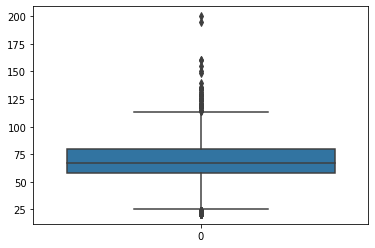

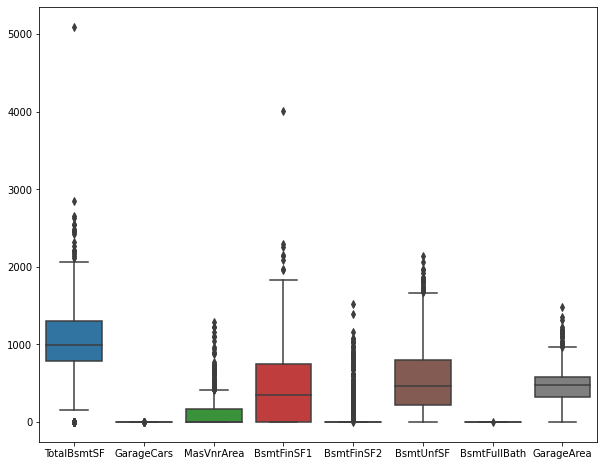

In [ ]:
sns.boxplot(data=X_test_num['LotFrontage'], orient='v');
plt.show();

plt.figure(figsize=(10,8))
sns.boxplot(data=X_test_num[['TotalBsmtSF', 'GarageCars', 'MasVnrArea', 'BsmtFinSF1', \
                             'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'GarageArea']]);
plt.show()

##### **Check Test Set Numerical Data**

In [ ]:
test_numeric_pipeline = make_pipeline(SimpleImputer())
test_numeric_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer())])

In [ ]:
test_full_pipeline_num = make_pipeline(test_numeric_pipeline, DecisionTreeClassifier())
test_full_pipeline_num

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer', SimpleImputer())])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
test_param_grid = {'decisiontreeclassifier__criterion': ['gini', 'entropy'],
                   'decisiontreeclassifier__max_depth': range(2, 8, 2),
                   'decisiontreeclassifier__min_samples_leaf': range(3, 5, 2),
                   'decisiontreeclassifier__min_samples_split': range(5, 15, 5)
                  }

test_param_grid

{'decisiontreeclassifier__criterion': ['gini', 'entropy'],
 'decisiontreeclassifier__max_depth': range(2, 8, 2),
 'decisiontreeclassifier__min_samples_leaf': range(3, 5, 2),
 'decisiontreeclassifier__min_samples_split': range(5, 15, 5)}

In [ ]:
test_search_num = GridSearchCV(test_full_pipeline_num, test_param_grid, cv=5, verbose=1)
test_search_num

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('simpleimputer',
                                                         SimpleImputer())])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 8, 2),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 5, 2),
                         'decisiontreeclassifier__min_samples_split': range(5, 15, 5)},
             verbose=1)

In [ ]:
test_search_num.fit(X_test_num, y[:1459])

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('simpleimputer',
                                                         SimpleImputer())])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 8, 2),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 5, 2),
                         'decisiontreeclassifier__min_samples_split': range(5, 15, 5)},
             verbose=1)

##### **Check Test Set Ordinal Data**

In [ ]:
X_test_cat_ord = X_test[X_cat_ord.columns]
X_test_cat_ord

,GarageCond,GarageFinish,GarageQual,Electrical,HeatingQC,BsmtFinType2,BsmtFinType1,BsmtExposure,KitchenQual,BsmtQual,BsmtCond,ExterCond,ExterQual,Functional
0,TA,Unf,TA,SBrkr,TA,LwQ,Rec,No,TA,TA,TA,TA,TA,Typ
1,TA,Unf,TA,SBrkr,TA,Unf,ALQ,No,Gd,TA,TA,TA,TA,Typ
2,TA,Fin,TA,SBrkr,Gd,Unf,GLQ,No,TA,Gd,TA,TA,TA,Typ
3,TA,Fin,TA,SBrkr,Ex,Unf,GLQ,No,Gd,TA,TA,TA,TA,Typ
4,TA,RFn,TA,SBrkr,Ex,Unf,ALQ,No,Gd,Gd,TA,TA,Gd,Typ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,NaN,NaN,NaN,SBrkr,Gd,Unf,Unf,No,TA,TA,TA,TA,TA,Typ
1455,TA,Unf,TA,SBrkr,TA,Unf,Rec,No,TA,TA,TA,TA,TA,Typ
1456,TA,Unf,TA,SBrkr,Ex,Unf,ALQ,No,TA,TA,TA,TA,TA,Typ
1457,NaN,NaN,NaN,SBrkr,TA,Unf,GLQ,Av,TA,Gd,TA,TA,TA,Typ


In [ ]:
X_test_cat_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageCond    1381 non-null   object
 1   GarageFinish  1381 non-null   object
 2   GarageQual    1381 non-null   object
 3   Electrical    1459 non-null   object
 4   HeatingQC     1459 non-null   object
 5   BsmtFinType2  1417 non-null   object
 6   BsmtFinType1  1417 non-null   object
 7   BsmtExposure  1415 non-null   object
 8   KitchenQual   1458 non-null   object
 9   BsmtQual      1415 non-null   object
 10  BsmtCond      1414 non-null   object
 11  ExterCond     1459 non-null   object
 12  ExterQual     1459 non-null   object
 13  Functional    1457 non-null   object
dtypes: object(14)
memory usage: 159.7+ KB


In [ ]:
X_cat_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageCond    1379 non-null   object
 1   GarageFinish  1379 non-null   object
 2   GarageQual    1379 non-null   object
 3   Electrical    1460 non-null   object
 4   HeatingQC     1460 non-null   object
 5   BsmtFinType2  1422 non-null   object
 6   BsmtFinType1  1423 non-null   object
 7   BsmtExposure  1422 non-null   object
 8   KitchenQual   1460 non-null   object
 9   BsmtQual      1423 non-null   object
 10  BsmtCond      1423 non-null   object
 11  ExterCond     1460 non-null   object
 12  ExterQual     1460 non-null   object
 13  Functional    1460 non-null   object
dtypes: object(14)
memory usage: 159.8+ KB


In [ ]:
X_test_cat_ord.Functional.value_counts()

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [ ]:
X_test_cat_ord[X_test_cat_ord.Functional.isna()]

,GarageCond,GarageFinish,GarageQual,Electrical,HeatingQC,BsmtFinType2,BsmtFinType1,BsmtExposure,KitchenQual,BsmtQual,BsmtCond,ExterCond,ExterQual,Functional
756,Po,Unf,Fa,FuseA,Po,NaN,NaN,NaN,Fa,NaN,NaN,Po,Fa,NaN
1013,Fa,Unf,TA,SBrkr,Fa,Unf,Unf,No,TA,TA,Fa,Fa,Fa,NaN


In [ ]:
X_test_cat_ord.loc[95, 'KitchenQual'] = 'Fa'
X_test_cat_ord.loc[756, 'Functional'] = 'Sev'
X_test_cat_ord.loc[1013, 'Functional'] = 'Sev'

X_test_cat_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageCond    1381 non-null   object
 1   GarageFinish  1381 non-null   object
 2   GarageQual    1381 non-null   object
 3   Electrical    1459 non-null   object
 4   HeatingQC     1459 non-null   object
 5   BsmtFinType2  1417 non-null   object
 6   BsmtFinType1  1417 non-null   object
 7   BsmtExposure  1415 non-null   object
 8   KitchenQual   1459 non-null   object
 9   BsmtQual      1415 non-null   object
 10  BsmtCond      1414 non-null   object
 11  ExterCond     1459 non-null   object
 12  ExterQual     1459 non-null   object
 13  Functional    1459 non-null   object
dtypes: object(14)
memory usage: 159.7+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
test_cat_ordinal_pipeline = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),\
                                          OrdinalEncoder(categories=cat_ord_categ))
test_cat_ordinal_pipeline

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='N_A', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['N_A', 'NA', 'Po', 'Fa', 'TA',
                                             'Gd', 'Ex'],
                                            ['N_A', 'NA', 'Unf', 'RFn', 'Fin'],
                                            ['N_A', 'NA', 'Po', 'Fa', 'TA',
                                             'Gd', 'Ex'],
                                            ['Mix', 'FuseP', 'FuseF', 'FuseA',
                                             'SBrkr'],
                                            ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                            ['N_A', 'NA', 'Unf', 'LwQ', 'Rec',
                                             'BLQ', 'ALQ', 'GLQ'],
                                            ['N_A', 'NA', 'Unf', 'LwQ', 'Rec',
                                             'BLQ', 'ALQ', 'GLQ'],
                                            ['N_A', 'NA', 'No', 'Mn', 'Av',
                                             'Gd'],
                                            ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                            ['N_A', 'NA', 'Po', 'Fa', 'TA',
                                             'Gd', 'Ex'],
                                            ['N_A', 'NA', 'Po', 'Fa', 'TA',
                                             'Gd', 'Ex'],
                                            ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                            ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                            ['Sal', 'Sev', 'Maj2', 'Maj1',
                                             'Mod', 'Min2', 'Min1', 'Typ']]))])

In [ ]:
test_full_pipeline_ord = make_pipeline(test_cat_ordinal_pipeline, DecisionTreeClassifier())
test_full_pipeline_ord

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(fill_value='N_A',
                                                strategy='constant')),
                                 ('ordinalencoder',
                                  OrdinalEncoder(categories=[['N_A', 'NA', 'Po',
                                                              'Fa', 'TA', 'Gd',
                                                              'Ex'],
                                                             ['N_A', 'NA',
                                                              'Unf', 'RFn',
                                                              'Fin'],
                                                             ['N_A', 'NA', 'Po',
                                                              'Fa', 'TA', 'Gd',
                                                              'Ex'],
                                                             ['Mix', 'FuseP',
                                                              'FuseF', 'FuseA',
                                                              'SBrkr'],
                                                             ['Po', 'Fa', 'TA',
                                                              'Gd', 'Ex'],
                                                             ['N_A', 'NA',
                                                              'Unf'...
                                                             ['N_A', 'NA',
                                                              'Unf', 'LwQ',
                                                              'Rec', 'BLQ',
                                                              'ALQ', 'GLQ'],
                                                             ['N_A', 'NA', 'No',
                                                              'Mn', 'Av',
                                                              'Gd'],
                                                             ['Po', 'Fa', 'TA',
                                                              'Gd', 'Ex'],
                                                             ['N_A', 'NA', 'Po',
                                                              'Fa', 'TA', 'Gd',
                                                              'Ex'],
                                                             ['N_A', 'NA', 'Po',
                                                              'Fa', 'TA', 'Gd',
                                                              'Ex'],
                                                             ['Po', 'Fa', 'TA',
                                                              'Gd', 'Ex'],
                                                             ['Po', 'Fa', 'TA',
                                                              'Gd', 'Ex'],
                                                             ['Sal', 'Sev',
                                                              'Maj2', 'Maj1',
                                                              'Mod', 'Min2',
                                                              'Min1',
                                                              'Typ']]))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
test_param_grid_ord = {'decisiontreeclassifier__criterion': ['gini', 'entropy'],
                       'decisiontreeclassifier__max_depth': range(2, 8, 2),
                       'decisiontreeclassifier__min_samples_leaf': range(3, 5, 2),
                       'decisiontreeclassifier__min_samples_split': range(5, 15, 5)
                      }
test_param_grid_ord

{'decisiontreeclassifier__criterion': ['gini', 'entropy'],
 'decisiontreeclassifier__max_depth': range(2, 8, 2),
 'decisiontreeclassifier__min_samples_leaf': range(3, 5, 2),
 'decisiontreeclassifier__min_samples_split': range(5, 15, 5)}

In [ ]:
test_search_ord = GridSearchCV(test_full_pipeline_ord, test_param_grid_ord, cv=5, verbose=1)
test_search_ord

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('simpleimputer',
                                                         SimpleImputer(fill_value='N_A',
                                                                       strategy='constant')),
                                                        ('ordinalencoder',
                                                         OrdinalEncoder(categories=[['N_A',
                                                                                     'NA',
                                                                                     'Po',
                                                                                     'Fa',
                                                                                     'TA',
                                                                                     'Gd',
                                                                                     'Ex'],
                                                                                    ['N_A',
                                                                                     'NA',
                                                                                     'Unf',
                                                                                     'RFn',
                                                                                     'Fin'],
                                                                                    ['N_A',
                                                                                     'NA',
                                                                                     'Po',
                                                                                     'Fa',
                                                                                     'TA',
                                                                                     'Gd',
                                                                                     'Ex'],
                                                                                    ['Mix',
                                                                                     'FuseP',
                                                                                     'FuseF',
                                                                                     'FuseA',
                                                                                     'SBrkr'],
                                                                                    ['Po',
                                                                                     'Fa',
                                                                                     'TA',...
                                                                                    ['Sal',
                                                                                     'Sev',
                                                                                     'Maj2',
                                                                                     'Maj1',
                                                                                     'Mod',
                                                                                     'Min2',
                                                                                     'Min1',
                                                                                     'Typ']]))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 8, 2),
        

In [ ]:
test_search_ord.fit(X_test_cat_ord, y[:1459])

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('simpleimputer',
                                                         SimpleImputer(fill_value='N_A',
                                                                       strategy='constant')),
                                                        ('ordinalencoder',
                                                         OrdinalEncoder(categories=[['N_A',
                                                                                     'NA',
                                                                                     'Po',
                                                                                     'Fa',
                                                                                     'TA',
                                                                                     'Gd',
                                                                                     'Ex'],
                                                                                    ['N_A',
                                                                                     'NA',
                                                                                     'Unf',
                                                                                     'RFn',
                                                                                     'Fin'],
                                                                                    ['N_A',
                                                                                     'NA',
                                                                                     'Po',
                                                                                     'Fa',
                                                                                     'TA',
                                                                                     'Gd',
                                                                                     'Ex'],
                                                                                    ['Mix',
                                                                                     'FuseP',
                                                                                     'FuseF',
                                                                                     'FuseA',
                                                                                     'SBrkr'],
                                                                                    ['Po',
                                                                                     'Fa',
                                                                                     'TA',...
                                                                                    ['Sal',
                                                                                     'Sev',
                                                                                     'Maj2',
                                                                                     'Maj1',
                                                                                     'Mod',
                                                                                     'Min2',
                                                                                     'Min1',
                                                                                     'Typ']]))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 8, 2),
        

##### **Check Test Set OneHot Data**

In [ ]:
X_test_cat_onehot = X_test[X_cat_onehot.iloc[:,:-1].columns]
X_test_cat_onehot

,MSZoning,Condition1,Foundation,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,GarageType,PavedDrive,SaleType,SaleCondition,MSSubClass
0,RH,Feedr,CBlock,Reg,Lvl,Inside,Gtl,NAmes,1Fam,1Story,Gable,VinylSd,VinylSd,None,Attchd,Y,WD,Normal,20
1,RL,Norm,CBlock,IR1,Lvl,Corner,Gtl,NAmes,1Fam,1Story,Hip,Wd Sdng,Wd Sdng,BrkFace,Attchd,Y,WD,Normal,20
2,RL,Norm,PConc,IR1,Lvl,Inside,Gtl,Gilbert,1Fam,2Story,Gable,VinylSd,VinylSd,None,Attchd,Y,WD,Normal,60
3,RL,Norm,PConc,IR1,Lvl,Inside,Gtl,Gilbert,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Attchd,Y,WD,Normal,60
4,RL,Norm,PConc,IR1,HLS,Inside,Gtl,StoneBr,TwnhsE,1Story,Gable,HdBoard,HdBoard,None,Attchd,Y,WD,Normal,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Norm,CBlock,Reg,Lvl,Inside,Gtl,MeadowV,Twnhs,2Story,Gable,CemntBd,CmentBd,None,NaN,Y,WD,Normal,160
1455,RM,Norm,CBlock,Reg,Lvl,Inside,Gtl,MeadowV,TwnhsE,2Story,Gable,CemntBd,CmentBd,None,CarPort,Y,WD,Abnorml,160
1456,RL,Norm,CBlock,Reg,Lvl,Inside,Gtl,Mitchel,1Fam,1Story,Gable,VinylSd,VinylSd,None,Detchd,Y,WD,Abnorml,20
1457,RL,Norm,PConc,Reg,Lvl,Inside,Gtl,Mitchel,1Fam,SFoyer,Gable,HdBoard,Wd Shng,None,NaN,Y,WD,Normal,85


In [ ]:
X_cat_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Condition1     1460 non-null   object
 2   Foundation     1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   BldgType       1460 non-null   object
 9   HouseStyle     1460 non-null   object
 10  RoofStyle      1460 non-null   object
 11  Exterior1st    1460 non-null   object
 12  Exterior2nd    1460 non-null   object
 13  MasVnrType     1452 non-null   object
 14  GarageType     1379 non-null   object
 15  PavedDrive     1460 non-null   object
 16  SaleType       1460 non-null   object
 17  SaleCondition  1460 non-null   object
 18  MSSubClass     1460 non-null

In [ ]:
X_test_cat_onehot['Date'] = X_test['MoSold'].astype(str) + X_test['YrSold'].astype(str)
X_test_cat_onehot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,MSZoning,Condition1,Foundation,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,GarageType,PavedDrive,SaleType,SaleCondition,MSSubClass,Date
0,RH,Feedr,CBlock,Reg,Lvl,Inside,Gtl,NAmes,1Fam,1Story,Gable,VinylSd,VinylSd,None,Attchd,Y,WD,Normal,20,62010
1,RL,Norm,CBlock,IR1,Lvl,Corner,Gtl,NAmes,1Fam,1Story,Hip,Wd Sdng,Wd Sdng,BrkFace,Attchd,Y,WD,Normal,20,62010
2,RL,Norm,PConc,IR1,Lvl,Inside,Gtl,Gilbert,1Fam,2Story,Gable,VinylSd,VinylSd,None,Attchd,Y,WD,Normal,60,32010
3,RL,Norm,PConc,IR1,Lvl,Inside,Gtl,Gilbert,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Attchd,Y,WD,Normal,60,62010
4,RL,Norm,PConc,IR1,HLS,Inside,Gtl,StoneBr,TwnhsE,1Story,Gable,HdBoard,HdBoard,None,Attchd,Y,WD,Normal,120,12010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Norm,CBlock,Reg,Lvl,Inside,Gtl,MeadowV,Twnhs,2Story,Gable,CemntBd,CmentBd,None,NaN,Y,WD,Normal,160,62006
1455,RM,Norm,CBlock,Reg,Lvl,Inside,Gtl,MeadowV,TwnhsE,2Story,Gable,CemntBd,CmentBd,None,CarPort,Y,WD,Abnorml,160,42006
1456,RL,Norm,CBlock,Reg,Lvl,Inside,Gtl,Mitchel,1Fam,1Story,Gable,VinylSd,VinylSd,None,Detchd,Y,WD,Abnorml,20,92006
1457,RL,Norm,PConc,Reg,Lvl,Inside,Gtl,Mitchel,1Fam,SFoyer,Gable,HdBoard,Wd Shng,None,NaN,Y,WD,Normal,85,72006


In [ ]:
X_test_cat_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1455 non-null   object
 1   Condition1     1459 non-null   object
 2   Foundation     1459 non-null   object
 3   LotShape       1459 non-null   object
 4   LandContour    1459 non-null   object
 5   LotConfig      1459 non-null   object
 6   LandSlope      1459 non-null   object
 7   Neighborhood   1459 non-null   object
 8   BldgType       1459 non-null   object
 9   HouseStyle     1459 non-null   object
 10  RoofStyle      1459 non-null   object
 11  Exterior1st    1458 non-null   object
 12  Exterior2nd    1458 non-null   object
 13  MasVnrType     1443 non-null   object
 14  GarageType     1383 non-null   object
 15  PavedDrive     1459 non-null   object
 16  SaleType       1458 non-null   object
 17  SaleCondition  1459 non-null   object
 18  MSSubClass     1459 non-null

In [ ]:
X_test_cat_onehot.loc[455, 'MSZoning'] = 'RH'
X_test_cat_onehot.loc[756, 'MSZoning'] = 'RH'
X_test_cat_onehot.loc[790, 'MSZoning'] = 'RH'
X_test_cat_onehot.loc[1444, 'MSZoning'] = 'RH'
X_test_cat_onehot.loc[691, 'Exterior1st'] = 'AsphShn'
X_test_cat_onehot.loc[1444, 'Exterior1st'] = 'AsphShn'
X_test_cat_onehot.loc[691, 'Exterior2nd'] = 'AsphShn'
X_test_cat_onehot.loc[660, 'Exterior2nd'] = 'AsphShn'
X_test_cat_onehot.loc[15, 'Exterior2nd'] = 'AsphShn'
X_test_cat_onehot.loc[1427, 'Exterior2nd'] = 'Stone'
X_test_cat_onehot.loc[7, 'Exterior2nd'] = 'Stone'
X_test_cat_onehot.loc[133, 'Exterior2nd'] = 'Stone'
X_test_cat_onehot.loc[1029, 'SaleType'] = 'Con'
X_test_cat_onehot.loc[1358, 'MSSubClass'] = 40


X_test_cat_onehot.loc[:, 'MSSubClass'] = X_test_cat_onehot['MSSubClass'].astype(str)


X_test_cat_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1459 non-null   object
 1   Condition1     1459 non-null   object
 2   Foundation     1459 non-null   object
 3   LotShape       1459 non-null   object
 4   LandContour    1459 non-null   object
 5   LotConfig      1459 non-null   object
 6   LandSlope      1459 non-null   object
 7   Neighborhood   1459 non-null   object
 8   BldgType       1459 non-null   object
 9   HouseStyle     1459 non-null   object
 10  RoofStyle      1459 non-null   object
 11  Exterior1st    1459 non-null   object
 12  Exterior2nd    1459 non-null   object
 13  MasVnrType     1443 non-null   object
 14  GarageType     1383 non-null   object
 15  PavedDrive     1459 non-null   object
 16  SaleType       1459 non-null   object
 17  SaleCondition  1459 non-null   object
 18  MSSubClass     1459 non-null

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
test_cat_onehot_pipeline = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),\
                                         OneHotEncoder(drop='first', handle_unknown="ignore")) # 
test_cat_onehot_pipeline

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='N_A', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(drop='first', handle_unknown='ignore'))])

In [ ]:
test_full_pipeline_onehot = make_pipeline(test_cat_onehot_pipeline, DecisionTreeClassifier())
test_full_pipeline_onehot

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(fill_value='N_A',
                                                strategy='constant')),
                                 ('onehotencoder',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
test_param_grid_onehot = {'decisiontreeclassifier__criterion': ['gini', 'entropy'],
                          'decisiontreeclassifier__max_depth': range(2, 8, 2),
                          'decisiontreeclassifier__min_samples_leaf': range(3, 5, 2),
                          'decisiontreeclassifier__min_samples_split': range(5, 15, 5)
                         }
test_param_grid_onehot

{'decisiontreeclassifier__criterion': ['gini', 'entropy'],
 'decisiontreeclassifier__max_depth': range(2, 8, 2),
 'decisiontreeclassifier__min_samples_leaf': range(3, 5, 2),
 'decisiontreeclassifier__min_samples_split': range(5, 15, 5)}

In [ ]:
test_search_onehot = GridSearchCV(test_full_pipeline_onehot, test_param_grid_onehot, verbose=1)
test_search_onehot

GridSearchCV(estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('simpleimputer',
                                                         SimpleImputer(fill_value='N_A',
                                                                       strategy='constant')),
                                                        ('onehotencoder',
                                                         OneHotEncoder(drop='first',
                                                                       handle_unknown='ignore'))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 8, 2),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 5, 2),
                         'decisiontreeclassifier__min_samples_split': range(5, 15, 5)},
             verbose=1)

In [ ]:
X_test_cat_onehot.Date.value_counts()

62008     57
72007     56
72006     53
62009     53
72008     52
72009     49
62006     48
62007     47
52007     46
52008     45
62010     45
52006     36
82007     35
42008     35
42010     33
52009     32
82009     32
52010     31
32007     30
92007     28
42007     27
32010     27
102009    26
32009     26
32006     26
102007    25
92006     25
102006    25
92009     24
82008     22
42009     22
82006     22
42006     21
22007     20
22008     18
92008     18
12007     18
32008     17
112007    17
112008    17
22009     17
12008     16
112009    15
22006     15
12010     15
122007    14
112006    14
122008    13
122006    12
22010     11
102008     8
12006      8
12009      7
122009     6
72010      2
Name: Date, dtype: int64

In [ ]:
X_cat_onehot.Date.value_counts()

72006     67
72009     61
62009     59
62007     59
72007     51
62008     51
72008     49
52010     48
62006     48
52007     43
82007     40
42010     39
52008     38
52006     38
52009     37
62010     36
82009     30
82008     29
102009    27
42006     27
42009     26
42008     26
32006     25
112007    24
102006    24
82006     23
42007     23
32007     23
112009    22
102008    22
32010     21
92009     20
32009     19
122007    18
32008     18
112008    17
92008     17
112006    16
102007    16
122009    15
22010     15
92006     15
122008    14
12007     13
12008     13
122006    12
12009     12
92007     11
22009     10
12010     10
12006     10
22008     10
22006      9
22007      8
72010      6
Name: Date, dtype: int64

In [ ]:
X_test_cat_onehot[X_test_cat_onehot.Date == '12010']

,MSZoning,Condition1,Foundation,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,GarageType,PavedDrive,SaleType,SaleCondition,MSSubClass,Date
4,RL,Norm,PConc,IR1,HLS,Inside,Gtl,StoneBr,TwnhsE,1Story,Gable,HdBoard,HdBoard,None,Attchd,Y,WD,Normal,120,12010
15,RL,Norm,PConc,IR1,Lvl,Inside,Gtl,NridgHt,1Fam,2Story,Gable,VinylSd,AsphShn,Stone,Attchd,Y,New,Partial,60,12010
22,RL,Norm,PConc,IR1,Lvl,Corner,Gtl,Gilbert,1Fam,1Story,Gable,VinylSd,VinylSd,None,Attchd,Y,WD,Normal,20,12010
23,RL,Norm,PConc,Reg,Lvl,Inside,Gtl,Blmngtn,TwnhsE,1Story,Gable,VinylSd,VinylSd,BrkFace,Attchd,Y,WD,Normal,120,12010
26,RL,Norm,PConc,IR2,Lvl,CulDSac,Gtl,NoRidge,1Fam,2Story,Hip,VinylSd,VinylSd,BrkFace,Attchd,Y,WD,Normal,60,12010
36,FV,Norm,PConc,Reg,Lvl,Inside,Gtl,Somerst,TwnhsE,2Story,Gable,VinylSd,VinylSd,None,Attchd,Y,WD,Normal,160,12010
53,RL,Norm,CBlock,IR1,Lvl,Inside,Gtl,NAmes,Duplex,1Story,Hip,HdBoard,HdBoard,BrkFace,NaN,Y,Oth,Abnorml,90,12010
55,RL,Artery,CBlock,Reg,Lvl,Corner,Gtl,NAmes,1Fam,1.5Fin,Gable,MetalSd,MetalSd,Stone,Attchd,Y,WD,Normal,50,12010
56,RL,Norm,CBlock,IR1,Lvl,Inside,Gtl,NAmes,1Fam,SFoyer,Gable,HdBoard,HdBoard,BrkFace,Attchd,Y,WD,Normal,85,12010
70,RM,Norm,PConc,Reg,Lvl,Corner,Gtl,OldTown,1Fam,1.5Fin,Hip,Wd Sdng,Wd Sdng,BrkFace,Basment,Y,COD,Abnorml,50,12010


In [ ]:
X_test_cat_onehot.loc[148, 'Date'] = '72010'
X_test_cat_onehot.loc[23, 'Date'] = '72010'
X_test_cat_onehot.loc[93, 'Date'] = '72010'
X_test_cat_onehot.loc[11, 'Date'] = '72010'
X_test_cat_onehot.loc[22, 'Date'] = '72010'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
lst = []

for elem1 in list(X_cat_onehot.Date.unique()):
  if elem1 not in list(X_test_cat_onehot.Date.unique()):
    lst.append(elem1)

lst

[]

In [ ]:
X_test_cat_onehot.Date.value_counts()

62008     57
72007     56
72006     53
62009     53
72008     52
72009     49
62006     48
62007     47
52007     46
52008     45
62010     45
52006     36
82007     35
42008     35
42010     33
52009     32
82009     32
52010     31
32007     30
92007     28
42007     27
32010     27
102009    26
32009     26
32006     26
102007    25
92006     25
102006    25
92009     24
82008     22
42009     22
82006     22
42006     21
22007     20
22008     18
92008     18
12007     18
32008     17
112007    17
112008    17
22009     17
12008     16
112009    15
22006     15
122007    14
112006    14
122008    13
122006    12
12010     12
22010      9
102008     8
12006      8
12009      7
72010      7
122009     6
Name: Date, dtype: int64

In [ ]:
test_search_onehot.fit(X_test_cat_onehot, y[:1459])  #[:1459]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [19] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [19] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [19] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [19] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [19] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [19] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in 

GridSearchCV(estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('simpleimputer',
                                                         SimpleImputer(fill_value='N_A',
                                                                       strategy='constant')),
                                                        ('onehotencoder',
                                                         OneHotEncoder(drop='first',
                                                                       handle_unknown='ignore'))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 8, 2),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 5, 2),
                         'decisiontreeclassifier__min_samples_split': range(5, 15, 5)},
             verbose=1)

##### **Predict Test Data**

In [ ]:
X_test = pd.concat([X_test_num, X_test_cat_ord, X_test_cat_onehot], axis=1)
X_test

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OverallQual,OverallCond,MasVnrArea,...,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,GarageType,PavedDrive,SaleType,SaleCondition,MSSubClass,Date
0,11622,80.0,882.0,2,0,1.0,140,5,6,0.0,...,Gable,VinylSd,VinylSd,None,Attchd,Y,WD,Normal,20,62010
1,14267,81.0,1329.0,3,0,1.0,393,6,6,108.0,...,Hip,Wd Sdng,Wd Sdng,BrkFace,Attchd,Y,WD,Normal,20,62010
2,13830,74.0,928.0,3,1,2.0,212,5,5,0.0,...,Gable,VinylSd,VinylSd,None,Attchd,Y,WD,Normal,60,32010
3,9978,78.0,926.0,3,1,2.0,360,6,6,20.0,...,Gable,VinylSd,VinylSd,BrkFace,Attchd,Y,WD,Normal,60,62010
4,5005,43.0,1280.0,2,0,2.0,0,8,5,0.0,...,Gable,HdBoard,HdBoard,None,Attchd,Y,WD,Normal,120,12010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,21.0,546.0,3,0,0.0,0,4,7,0.0,...,Gable,CemntBd,CmentBd,None,NaN,Y,WD,Normal,160,62006
1455,1894,21.0,546.0,3,0,1.0,0,4,5,0.0,...,Gable,CemntBd,CmentBd,None,CarPort,Y,WD,Abnorml,160,42006
1456,20000,160.0,1224.0,4,1,2.0,474,5,7,0.0,...,Gable,VinylSd,VinylSd,None,Detchd,Y,WD,Abnorml,20,92006
1457,10441,62.0,912.0,3,0,0.0,80,5,5,0.0,...,Gable,HdBoard,Wd Shng,None,NaN,Y,WD,Normal,85,72006


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1459 non-null   int64  
 1   LotFrontage    1232 non-null   float64
 2   TotalBsmtSF    1458 non-null   float64
 3   BedroomAbvGr   1459 non-null   int64  
 4   Fireplaces     1459 non-null   int64  
 5   GarageCars     1458 non-null   float64
 6   WoodDeckSF     1459 non-null   int64  
 7   OverallQual    1459 non-null   int64  
 8   OverallCond    1459 non-null   int64  
 9   MasVnrArea     1444 non-null   float64
 10  BsmtFinSF1     1458 non-null   float64
 11  BsmtFinSF2     1458 non-null   float64
 12  BsmtUnfSF      1458 non-null   float64
 13  1stFlrSF       1459 non-null   int64  
 14  2ndFlrSF       1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  FullBath       1459 non-null   int64  
 18  HalfBath

In [ ]:
y_test_pred = search.predict(X_test)
y_test_pred

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [10] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test_true = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/results_class_kaggle.csv', index_col='Id')
y_test_true

,Expensive
Id,
1461,0
1462,0
1463,0
1464,0
1465,0
...,...
2915,0
2916,0
2917,0


In [ ]:
accuracy_score(y_test_true, y_test_pred)

0.95407813570939